<a href="https://colab.research.google.com/github/REICHIYAN/REI/blob/master/Correlated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

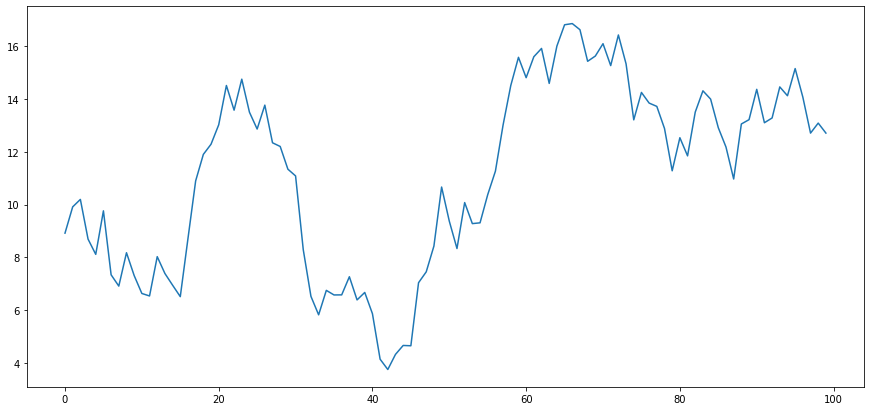

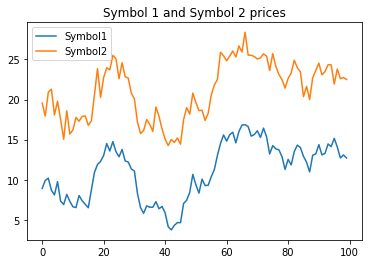

2.044324409938381e-13


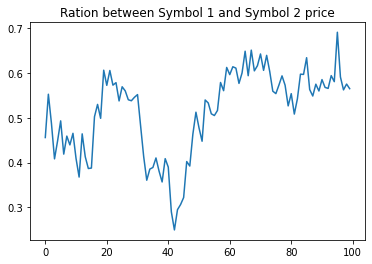

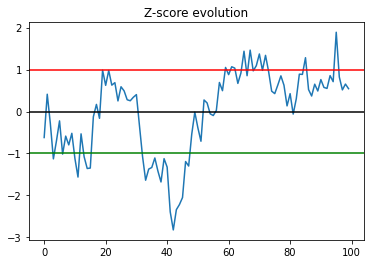

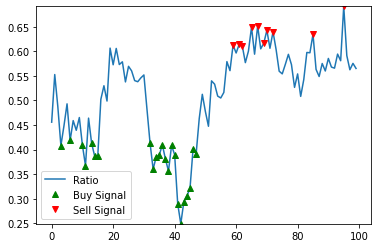

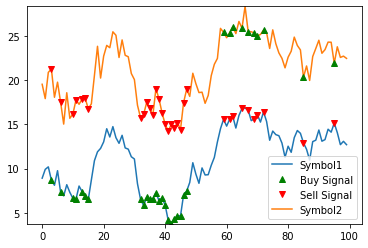

In [5]:
import numpy as np
import pandas as pd
from statsmodels.tsa.stattools import coint
import matplotlib.pyplot as plt
# Set a seed value to make the experience reproducible
np.random.seed(123)

# Generate Symbol1 daily returns
Symbol1_returns = np.random.normal(0, 1, 100)
# Create a series for Symbol1 prices
Symbol1_prices = pd.Series(np.cumsum(Symbol1_returns),\
                           name='Symbol1') + 10
Symbol1_prices.plot(figsize=(15,7))
plt.show()

# Create a series for Symbol2 prices
# We are going to mimikate the Symbol1 behavior
noise = np.random.normal(0, 1, 100)
Symbol2_prices = Symbol1_prices + 10 + noise
Symbol2_prices.name = 'Symbol2'

plt.title("Symbol 1 and Symbol 2 prices")
Symbol1_prices.plot()
Symbol2_prices.plot()
plt.legend()
plt.show()


def zscore(series):
    return (series - series.mean()) / np.std(series)

score, pvalue, _ = coint(Symbol1_prices, Symbol2_prices)
print(pvalue)
ratios = Symbol1_prices / Symbol2_prices
plt.title("Ration between Symbol 1 and Symbol 2 price")

ratios.plot()
plt.show()


#plt.axhline(ratios.mean())
#plt.legend([' Ratio'])



zscore(ratios).plot()
plt.title("Z-score evolution")
plt.axhline(zscore(ratios).mean(),color="black")
plt.axhline(1.0, color="red")
plt.axhline(-1.0, color="green")
plt.show()




ratios.plot()
buy = ratios.copy()
sell = ratios.copy()
buy[zscore(ratios)>-1] = 0
sell[zscore(ratios)<1] = 0
buy.plot(color="g", linestyle="None", marker="^")
sell.plot(color="r", linestyle="None", marker="v")
x1,x2,y1,y2 = plt.axis()
plt.axis((x1,x2,ratios.min(),ratios.max()))
plt.legend(["Ratio", "Buy Signal", "Sell Signal"])
plt.show()


symbol1_buy=Symbol1_prices.copy()
symbol1_sell=Symbol1_prices.copy()
symbol2_buy=Symbol2_prices.copy()
symbol2_sell=Symbol2_prices.copy()

Symbol1_prices.plot()
symbol1_buy[zscore(ratios)>-1] = 0
symbol1_sell[zscore(ratios)<1] = 0
symbol1_buy.plot(color="g", linestyle="None", marker="^")
symbol1_sell.plot(color="r", linestyle="None", marker="v")

Symbol2_prices.plot()
symbol2_buy[zscore(ratios)<1] = 0
symbol2_sell[zscore(ratios)>-1] = 0
symbol2_buy.plot(color="g", linestyle="None", marker="^")
symbol2_sell.plot(color="r", linestyle="None", marker="v")


x1,x2,y1,y2 = plt.axis()
plt.axis((x1,x2,Symbol1_prices.min(),Symbol2_prices.max()))
plt.legend(["Symbol1", "Buy Signal", "Sell Signal","Symbol2"])
plt.show()

File not found...downloading the symbols data
[('ADBE', 'MSFT'), ('JNPR', 'AMD'), ('JNPR', 'IBM')]


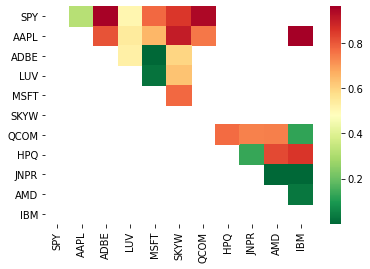

[('ADBE', 'MSFT'), ('JNPR', 'AMD'), ('JNPR', 'IBM')]
Attributes  Adj Close                                                                                                                   Close                                                                                                           High                                                                                                     Low                                                                                                        Open                                                                                                      Volume                                                                                                                      
Symbols           SPY      AAPL       ADBE        LUV       MSFT       SKYW       QCOM        HPQ        JNPR      AMD        IBM         SPY      AAPL       ADBE        LUV      MSFT     SKYW      QCOM        HPQ      JNPR      AMD      IBM        SPY    

In [2]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import coint
import seaborn


from pandas_datareader import data

symbolsIds = ['SPY','AAPL','ADBE','LUV','MSFT',\
              'SKYW','QCOM',
                 'HPQ','JNPR','AMD','IBM']

def load_financial_data(symbols, start_date, end_date,output_file):
    try:
        df = pd.read_pickle(output_file)
        print('File data found...reading symbols data')
    except FileNotFoundError:
        print('File not found...downloading the symbols data')
        df = data.DataReader(symbols, 'yahoo', start_date, end_date)
        df.to_pickle(output_file)
    return df

data=load_financial_data(symbolsIds,start_date='2001-01-01',
                    end_date = '2018-01-01',
                    output_file='multi_data_large.pkl')




def find_cointegrated_pairs(data):
    n = data.shape[1]
    pvalue_matrix = np.ones((n, n))
    keys = data.keys()
    pairs = []
    for i in range(n):
        for j in range(i+1, n):
            result = coint(data[keys[i]], data[keys[j]])
            pvalue_matrix[i, j] = result[1]
            if result[1] < 0.02:
                pairs.append((keys[i], keys[j]))
    return pvalue_matrix, pairs


pvalues, pairs = find_cointegrated_pairs(data['Adj Close'])
print(pairs)

seaborn.heatmap(pvalues, xticklabels=symbolsIds,
                yticklabels=symbolsIds, cmap='RdYlGn_r',
                mask = (pvalues >= 0.98))
plt.show()
print (pairs)


print(data.head(3))

File data found...reading symbols data


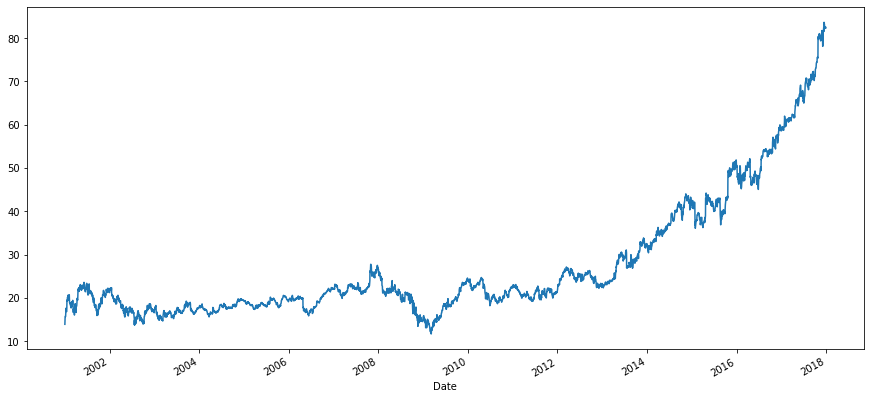

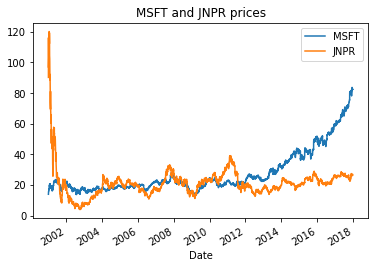

1.0


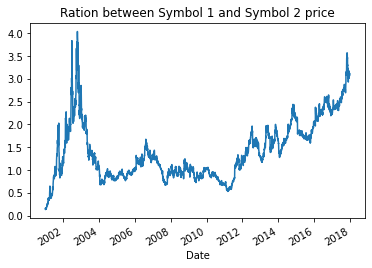

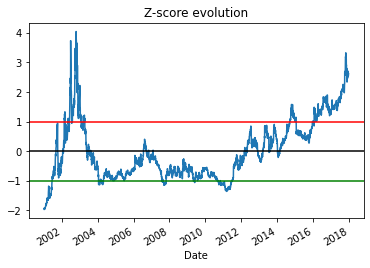

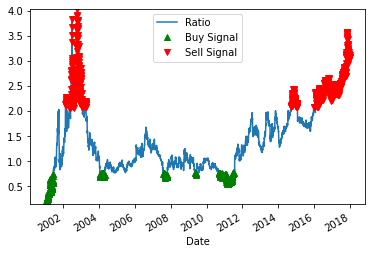

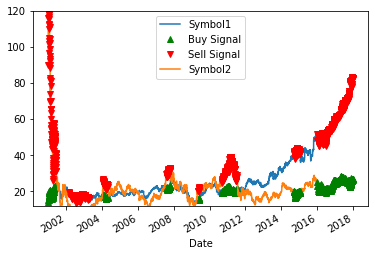

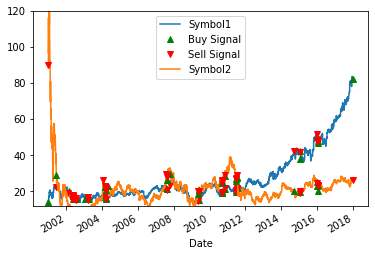

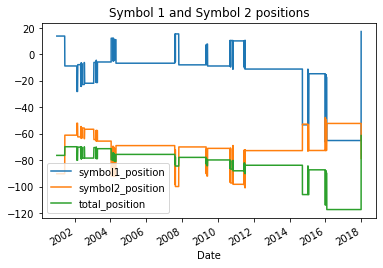

13.876167297363281 90.21614074707031
15.335761070251465 116.10997772216797
15.495715141296387 110.22750854492188
15.71566390991211 96.59339141845703
15.655667304992676 101.58248138427734
16.575420379638672 103.0805892944336
16.915321350097656 104.94977569580078
17.595138549804688 116.38485717773438
17.115262985229492 115.67015075683594
16.815349578857422 112.59148406982422
16.93531608581543 119.79337310791016
17.755096435546875 120.17823028564453
19.51460838317871 118.14409637451172
19.23468589782715 112.20665740966797
19.374649047851562 119.3398208618164
20.134435653686523 117.86920928955078
19.7745304107666 111.21709442138672
20.474342346191406 104.45499420166016
20.634296417236328 102.25595092773438
20.274396896362305 98.90237426757812
19.53459930419922 93.18484497070312
19.95448875427246 95.27394104003906
19.454620361328125 88.56684112548828
19.814523696899414 92.14028930664062
20.014467239379883 89.88627624511719
20.694272994995117 83.01422119140625
19.91449737548828 81.8597412109

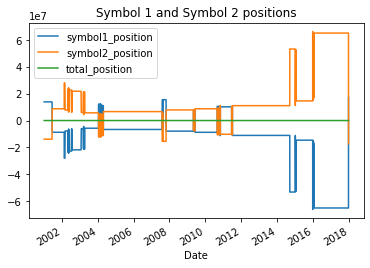

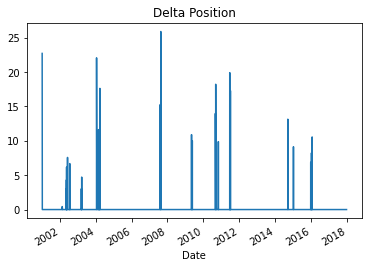

In [3]:
import numpy as np
import pandas as pd
from statsmodels.tsa.stattools import coint
import matplotlib.pyplot as plt
# Set a seed value to make the experience reproducible
np.random.seed(123)


import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import coint
import seaborn


from pandas_datareader import data

symbolsIds = ['SPY','AAPL','ADBE','LUV','MSFT','SKYW','QCOM',
                 'HPQ','JNPR','AMD','IBM']

def load_financial_data(symbols, start_date, end_date,output_file):
    try:
        df = pd.read_pickle(output_file)
        print('File data found...reading symbols data')
    except FileNotFoundError:
        print('File not found...downloading the symbols data')
        df = data.DataReader(symbols, 'yahoo', start_date, end_date)
        df.to_pickle(output_file)
    return df

data=load_financial_data(symbolsIds,start_date='2001-01-01',
                    end_date = '2018-01-01',
                    output_file='multi_data_large.pkl')


Symbol1_prices = data['Adj Close']['MSFT']
Symbol1_prices.plot(figsize=(15,7))
plt.show()
Symbol2_prices = data['Adj Close']['JNPR']
Symbol2_prices.name = 'JNPR'
plt.title("MSFT and JNPR prices")
Symbol1_prices.plot()
Symbol2_prices.plot()
plt.legend()
plt.show()




def zscore(series):
    return (series - series.mean()) / np.std(series)

score, pvalue, _ = coint(Symbol1_prices, Symbol2_prices)
print(pvalue)
ratios = Symbol1_prices / Symbol2_prices
plt.title("Ration between Symbol 1 and Symbol 2 price")

ratios.plot()
plt.show()


#plt.axhline(ratios.mean())
#plt.legend([' Ratio'])



zscore(ratios).plot()
plt.title("Z-score evolution")
plt.axhline(zscore(ratios).mean(),color="black")
plt.axhline(1.0, color="red")
plt.axhline(-1.0, color="green")
plt.show()




ratios.plot()
buy = ratios.copy()
sell = ratios.copy()
buy[zscore(ratios)>-1] = 0
sell[zscore(ratios)<1] = 0
buy.plot(color="g", linestyle="None", marker="^")
sell.plot(color="r", linestyle="None", marker="v")
x1,x2,y1,y2 = plt.axis()
plt.axis((x1,x2,ratios.min(),ratios.max()))
plt.legend(["Ratio", "Buy Signal", "Sell Signal"])
plt.show()


symbol1_buy=Symbol1_prices.copy()
symbol1_sell=Symbol1_prices.copy()
symbol2_buy=Symbol2_prices.copy()
symbol2_sell=Symbol2_prices.copy()

Symbol1_prices.plot()
symbol1_buy[zscore(ratios)>-1] = 0
symbol1_sell[zscore(ratios)<1] = 0
symbol1_buy.plot(color="g", linestyle="None", marker="^")
symbol1_sell.plot(color="r", linestyle="None", marker="v")

pair_correlation_trading_strategy = pd.DataFrame(index=Symbol1_prices.index)
pair_correlation_trading_strategy['symbol1_price']=Symbol1_prices
pair_correlation_trading_strategy['symbol1_buy']=np.zeros(len(Symbol1_prices))
pair_correlation_trading_strategy['symbol1_sell']=np.zeros(len(Symbol1_prices))
pair_correlation_trading_strategy['symbol2_buy']=np.zeros(len(Symbol1_prices))
pair_correlation_trading_strategy['symbol2_sell']=np.zeros(len(Symbol1_prices))


position=0
for i in range(len(Symbol1_prices)):
    s1price=Symbol1_prices[i]
    s2price=Symbol2_prices[i]
    if not position and symbol1_buy[i]!=0:
        pair_correlation_trading_strategy['symbol1_buy'][i]=s1price
        pair_correlation_trading_strategy['symbol2_sell'][i] = s2price
        position=1
    elif not position and symbol1_sell[i]!=0:
        pair_correlation_trading_strategy['symbol1_sell'][i] = s1price
        pair_correlation_trading_strategy['symbol2_buy'][i] = s2price
        position = -1
    elif position==-1 and (symbol1_sell[i]==0 or i==len(Symbol1_prices)-1):
        pair_correlation_trading_strategy['symbol1_buy'][i] = s1price
        pair_correlation_trading_strategy['symbol2_sell'][i] = s2price
        position = 0
    elif position==1 and (symbol1_buy[i] == 0 or i==len(Symbol1_prices)-1):
        pair_correlation_trading_strategy['symbol1_sell'][i] = s1price
        pair_correlation_trading_strategy['symbol2_buy'][i] = s2price
        position = 0




Symbol2_prices.plot()
symbol2_buy[zscore(ratios)<1] = 0
symbol2_sell[zscore(ratios)>-1] = 0
symbol2_buy.plot(color="g", linestyle="None", marker="^")
symbol2_sell.plot(color="r", linestyle="None", marker="v")

x1,x2,y1,y2 = plt.axis()
plt.axis((x1,x2,Symbol1_prices.min(),Symbol2_prices.max()))
plt.legend(["Symbol1", "Buy Signal", "Sell Signal","Symbol2"])
plt.show()




Symbol1_prices.plot()
pair_correlation_trading_strategy['symbol1_buy'].plot(color="g", linestyle="None", marker="^")
pair_correlation_trading_strategy['symbol1_sell'].plot(color="r", linestyle="None", marker="v")
Symbol2_prices.plot()
pair_correlation_trading_strategy['symbol2_buy'].plot(color="g", linestyle="None", marker="^")
pair_correlation_trading_strategy['symbol2_sell'].plot(color="r", linestyle="None", marker="v")
x1,x2,y1,y2 = plt.axis()
plt.axis((x1,x2,Symbol1_prices.min(),Symbol2_prices.max()))
plt.legend(["Symbol1", "Buy Signal", "Sell Signal","Symbol2"])
plt.show()

pair_correlation_trading_strategy['symbol1_buy'].head()


pair_correlation_trading_strategy['symbol1_position']=\
pair_correlation_trading_strategy['symbol1_buy']-pair_correlation_trading_strategy['symbol1_sell']

pair_correlation_trading_strategy['symbol2_position']=\
pair_correlation_trading_strategy['symbol2_buy']-pair_correlation_trading_strategy['symbol2_sell']

pair_correlation_trading_strategy['symbol1_position'].cumsum().plot()
pair_correlation_trading_strategy['symbol2_position'].cumsum().plot()

pair_correlation_trading_strategy['total_position']=\
pair_correlation_trading_strategy['symbol1_position']+pair_correlation_trading_strategy['symbol2_position']
pair_correlation_trading_strategy['total_position'].cumsum().plot()
plt.title("Symbol 1 and Symbol 2 positions")
plt.legend()
plt.show()



pair_correlation_trading_strategy['symbol1_price']=Symbol1_prices
pair_correlation_trading_strategy['symbol1_buy']=np.zeros(len(Symbol1_prices))
pair_correlation_trading_strategy['symbol1_sell']=np.zeros(len(Symbol1_prices))
pair_correlation_trading_strategy['symbol2_buy']=np.zeros(len(Symbol1_prices))
pair_correlation_trading_strategy['symbol2_sell']=np.zeros(len(Symbol1_prices))
pair_correlation_trading_strategy['delta']=np.zeros(len(Symbol1_prices))


position=0
s1_shares = 1000000
for i in range(len(Symbol1_prices)):
    s1positions= Symbol1_prices[i] * s1_shares
    s2positions= Symbol2_prices[i] * int(s1positions/Symbol2_prices[i])
    print(Symbol1_prices[i],Symbol2_prices[i])
    delta_position=s1positions-s2positions
    if not position and symbol1_buy[i]!=0:
        pair_correlation_trading_strategy['symbol1_buy'][i]=s1positions
        pair_correlation_trading_strategy['symbol2_sell'][i] = s2positions
        pair_correlation_trading_strategy['delta'][i]=delta_position
        position=1
    elif not position and symbol1_sell[i]!=0:
        pair_correlation_trading_strategy['symbol1_sell'][i] = s1positions
        pair_correlation_trading_strategy['symbol2_buy'][i] = s2positions
        pair_correlation_trading_strategy['delta'][i] = delta_position
        position = -1
    elif position==-1 and (symbol1_sell[i]==0 or i==len(Symbol1_prices)-1):
        pair_correlation_trading_strategy['symbol1_buy'][i] = s1positions
        pair_correlation_trading_strategy['symbol2_sell'][i] = s2positions
        position = 0
    elif position==1 and (symbol1_buy[i] == 0 or i==len(Symbol1_prices)-1):
        pair_correlation_trading_strategy['symbol1_sell'][i] = s1positions
        pair_correlation_trading_strategy['symbol2_buy'][i] = s2positions
        position = 0


pair_correlation_trading_strategy['symbol1_position']=\
pair_correlation_trading_strategy['symbol1_buy']-pair_correlation_trading_strategy['symbol1_sell']

pair_correlation_trading_strategy['symbol2_position']=\
pair_correlation_trading_strategy['symbol2_buy']-pair_correlation_trading_strategy['symbol2_sell']

pair_correlation_trading_strategy['symbol1_position'].cumsum().plot()
pair_correlation_trading_strategy['symbol2_position'].cumsum().plot()

pair_correlation_trading_strategy['total_position']=\
pair_correlation_trading_strategy['symbol1_position']+pair_correlation_trading_strategy['symbol2_position']
pair_correlation_trading_strategy['total_position'].cumsum().plot()
plt.title("Symbol 1 and Symbol 2 positions")
plt.legend()
plt.show()


pair_correlation_trading_strategy['delta'].plot()
plt.title("Delta Position")
plt.show()